In [68]:
%matplotlib widget
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.auto import tqdm
import itertools
from multiprocessing import Pool

In [16]:
SUFFIX = "pr"
PATH_TO_PR = "/scratch/shared/beegfs/prannay/ego4d_data/ckpt/results/traces_v2_all/vq_stats_val_{}_{}.pkl"

In [56]:
with open("/scratch/shared/beegfs/prannay/ego4d_data/ckpt/results/traces_v2_all/available_all.txt", "r") as f:
    available = f.read().splitlines()
    available = sorted([int(a.split("_")[3]) for a in available])
print(available)
print(len(available))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
200


In [57]:
def pr_curve_worker(ind, suffix):
    with open(PATH_TO_PR.format(ind, suffix), "rb") as f:
        return pickle.load(f)

In [58]:
def combine_pr_curves(inds, suffix=SUFFIX):
    with Pool(8) as p:
        pr_curves = p.starmap(pr_curve_worker, itertools.product(inds, [suffix]))
    return list(pr_curves)
    # for ind in tqdm(inds, total=len(inds)):
    #     with open(PATH_TO_PR.format(ind, suffix), "rb") as f:
    #         pr_curves.append(pickle.load(f))
    # return pr_curves

In [59]:
pr_curves = combine_pr_curves(available)
pr_curves = sorted(itertools.chain(*pr_curves), key=lambda x: x["dataset_uid"])

In [60]:
pr_curves_np = np.concatenate([p['precision'] for p in pr_curves], axis=2)
print(pr_curves_np.shape)

(10, 101, 4504, 1, 3)


In [61]:
recalls = np.linspace(.0, 1.00, int(np.round((1.00 - .0) / .01)) + 1, endpoint=True)

In [62]:
# # plot the curves depending on the total
# n_per_row = 5
# total = pr_curves_np.shape[2]
# recalls = np.linspace(.0, 1.00, int(np.round((1.00 - .0) / .01)) + 1, endpoint=True)
# n_rows = int(np.ceil(total / n_per_row))
# fig, axes = plt.subplots(n_rows, n_per_row, figsize=(20, 20))
# for i in range(n_rows):
#     for j in range(n_per_row):
#         ind = i * n_per_row + j
#         if ind >= total:
#             break
#         axes[i, j].plot(recalls, pr_curves_np[0, :, ind, :, -1])
#         # axes[i, j].set_title("Dataset {}".format(ind))
#         axes[i, j].set_xlim([0.0, 1.0])
#         axes[i, j].set_ylim([-0.1, 1.1])
# plt.tight_layout()
# plt.show()

(10, 101, 1, 3)
[0.48613041 0.48499115 0.48568936]


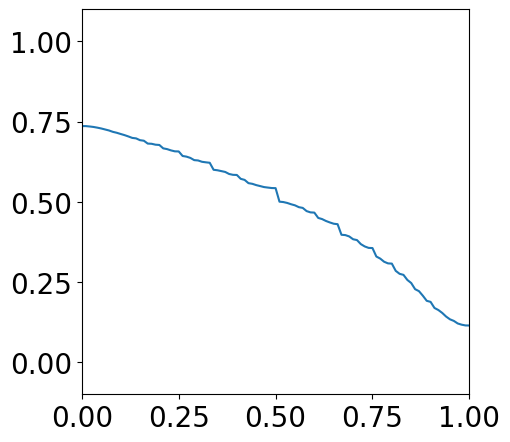

In [63]:
# plot the average curve
pr_curves_np_mean = np.mean(pr_curves_np, axis=2)
print(pr_curves_np_mean.shape)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
print(pr_curves_np_mean[0, :, 0, :].mean(axis=0))
ax.plot(recalls, pr_curves_np_mean[0, :, 0, 0])
ax.set_xlim([0.0, 1.0])
ax.set_ylim([-0.1, 1.1])
plt.show()

In [64]:
SUFFIXES = ["pr", "pr_dino_only", "pr_sc_dino_mean", "pr_sc_dino_gmean", "pr_sc_dino_sm50_gmean", "pr_sc_dino_sm50_mean"]
for suffix in SUFFIXES:
    for i in range(0, 200):
        if not os.path.exists(PATH_TO_PR.format(i, suffix)):
            print("Missing {} {}".format(i, suffix))

In [65]:
SUFFIXES = ["pr", "pr_dino_only", "pr_sc_dino_mean", "pr_sc_dino_gmean", "pr_sc_dino_sm50_gmean", "pr_sc_dino_sm50_mean"]
for suffix in SUFFIXES:
    for i in range(0, 200):
        if not os.path.exists(PATH_TO_PR.format(i, suffix)):
            print(i)
dict_pr_curves = {}
for suffix in tqdm(SUFFIXES):
    pr_curves = combine_pr_curves(available, suffix=suffix)
    pr_curves = sorted(itertools.chain(*pr_curves), key=lambda x: x["dataset_uid"])
    pr_curves_np = np.concatenate([p['precision'] for p in pr_curves], axis=2)
    print(pr_curves_np.shape)
    dict_pr_curves[suffix] = pr_curves_np

  0%|          | 0/6 [00:00<?, ?it/s]

(10, 101, 4504, 1, 3)
(10, 101, 4504, 1, 3)
(10, 101, 4504, 1, 3)
(10, 101, 4504, 1, 3)
(10, 101, 4504, 1, 3)
(10, 101, 4504, 1, 3)


In [66]:
# # plot the curves per suffix
# n_per_row = 5
# total = pr_curves_np.shape[2]
# recalls = np.linspace(.0, 1.00, int(np.round((1.00 - .0) / .01)) + 1, endpoint=True)
# n_rows = int(np.ceil(total / n_per_row))
# fig, axes = plt.subplots(n_rows, n_per_row, figsize=(20, 20))
# for i in range(n_rows):
#     for j in range(n_per_row):
#         ind = i * n_per_row + j
#         if ind >= total:
#             break
#         for suffix in SUFFIXES:
#             # print(dict_pr_curves[suffix].shape)
#             axes[i, j].plot(recalls, dict_pr_curves[suffix][0, :, ind, 0, -1], label=suffix)
#         axes[i, j].set_xlim([0.0, 1.0])
#         axes[i, j].set_ylim([-0.1, 1.1])
#         if i == 0 and j == 0:
#             axes[i, j].legend()
# plt.tight_layout()
# plt.show()

(101,) 0.4856893599705563
(101,) 0.3024818748708969
(101,) 0.470442345476466
(101,) 0.4981264812103598
(101,) 0.4663083787657727
(101,) 0.4479910244063366


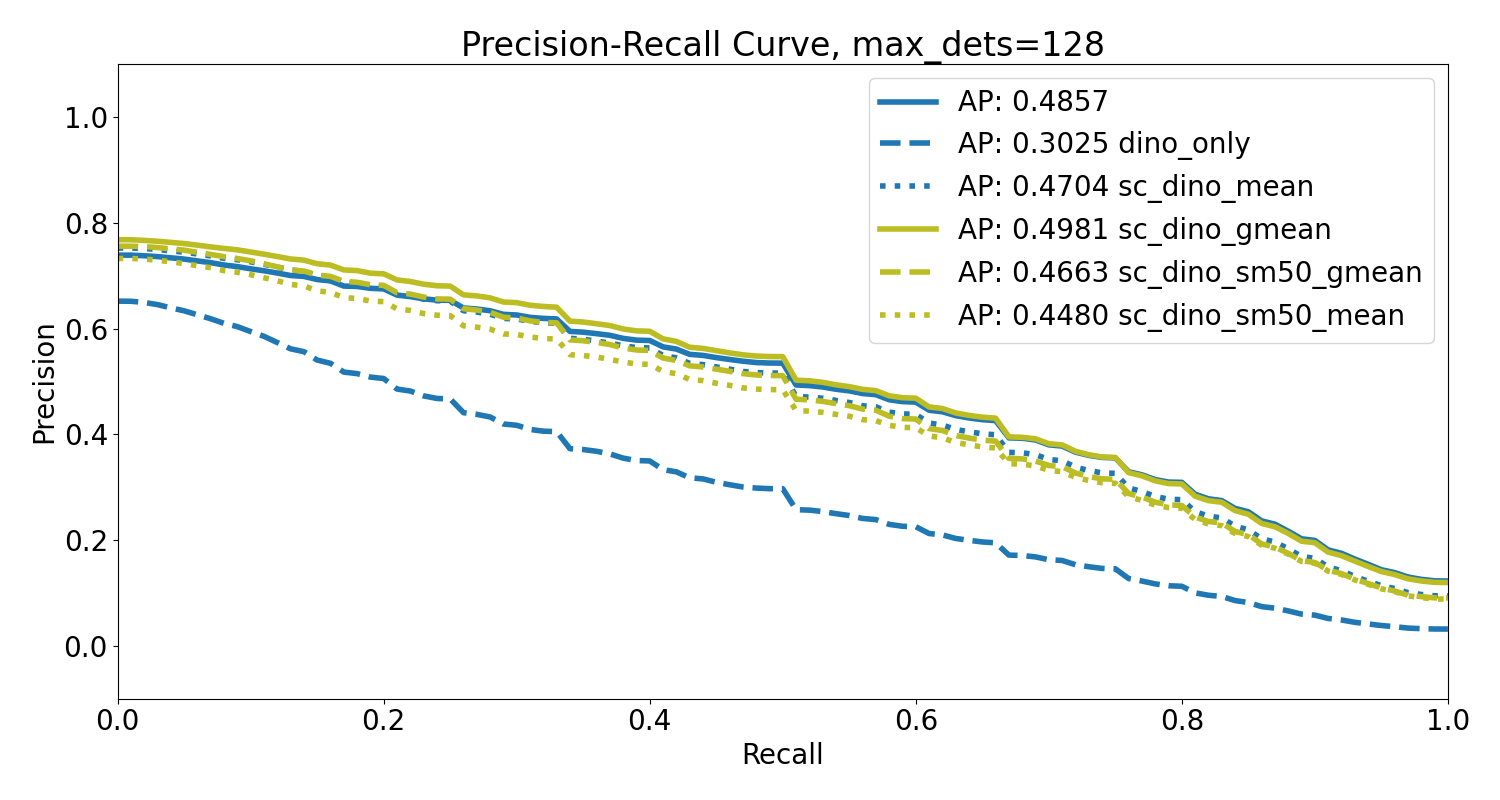

In [72]:
# plot the average curve per suffix
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# use different linestyles and colors for colourblind people
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
linestyles = ['-', '--', ':']
colors = ['tab:blue', 'tab:olive']
# use a cycler for colors and linestyles
from cycler import cycler
ax.set_prop_cycle(cycler(color=colors) * cycler(linestyle=linestyles))
# ax.set_prop_cycle(cycler(linestyle=linestyles))
max_det = 128
det_ind = {1: 0, 10: 1, 128: 2}[max_det]
for suffix in SUFFIXES:
    ps = np.mean(dict_pr_curves[suffix], axis=2)[0, :, 0, det_ind]
    print(ps.shape, ps.mean())
    ax.plot(recalls, ps, label="AP: {1:.4f} {0}".format(suffix[3:], ps.mean()), lw=4.0)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([-0.1, 1.1])
# max_dets = {0: 1, 1: 10, 2: 128}
# make text larger
plt.rc('font', size=20)
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision-Recall Curve, max_dets={}".format(max_det))
ax.legend()
plt.tight_layout()
plt.show()